## Выгрузка в датафрейм первый набор (игры в Steam)


https://www.kaggle.com/datasets/wajihulhassan369/steam-games-dataset. Набор представляет собой данные об экшенах, доступных в Steam. Эта информация полезна для изучения игровых паттернов, моделирования цен и исследования корреляции между игровыми тегами и методами ценообразования. Этот набор позволяет провести предварительный анализ данных, построить модели машинного обучения или исследовать игровую индустрию. В наборе пресдтавлена дата, различные теги, рейтинг отзывов. Так можно понять, какие теги популярнее, что в играх людям нравится больше, изменилось ли качество игр со временем и т.д. Для бизнеса такой набор данных может быть полезен для прогнозирования, в разработку каки игр целесообразнее вкладываться. Так компания не потеряет деньги.
Пример цели: Разработка игры на пк в нужную фазу рынка
Входные данные: год выпуска, сумма продаж
Целевой признак: продаваемость игр в текущей фазе рынка в сравнении с предыдущими.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(".//static//csv//steam_cleaned.csv")
print(df.columns)

Index(['Name', 'Price', 'Release_date', 'Review_no', 'Review_type', 'Tags',
       'Description'],
      dtype='object')


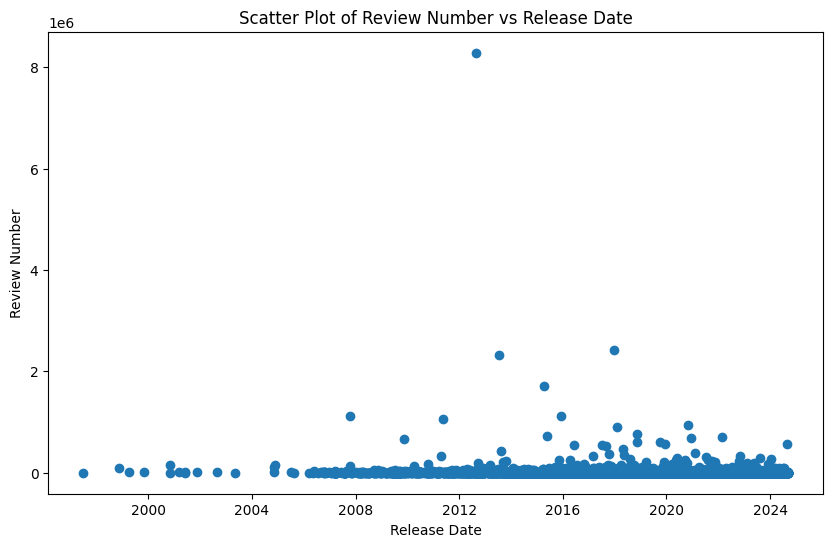

In [32]:
# Преобразуем дату выпуска в формат datetime
df['Release_date'] = pd.to_datetime(df['Release_date'])

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.scatter(df['Release_date'], df['Review_no'])
plt.xlabel('Release Date')
plt.ylabel('Review Number')
plt.title('Scatter Plot of Review Number vs Release Date')
plt.show()

При проверке на шум можно заметить выброс в 2014 году. количество обзоров там запредельное. 

Все выбросы удалены путём определения порогов квантилями. Зашумленность не очень высокая. Покрытие данных высокое и подошло бы для поставленной задачи по актуальности.

Выбросы:
                                   Name  Price Release_date  Review_no  \
18                     GUNDAM BREAKER 4  59.99   2024-08-29     1846.0   
22                    LOCKDOWN Protocol   5.49   2024-07-22     2192.0   
34                          CarX Street  19.99   2024-08-29     4166.0   
45    Harry Potter: Quidditch Champions  25.99   2024-09-03     1216.0   
61                              SMITE 2  18.00   2024-08-27     1633.0   
...                                 ...    ...          ...        ...   
7695                   Dude Simulator 2   2.99   2018-07-28     1734.0   
7717     Golfing Over It with Alva Majo   2.39   2018-03-28     1367.0   
7740                   Dungeon Siege II   4.99   2005-08-16     2274.0   
7765                   Phantom Doctrine  12.99   2018-08-14     3538.0   
7768         NECROPOLIS: BRUTAL EDITION  19.99   2016-07-12     3668.0   

          Review_type                                               Tags  \
18      Very Positive  Act

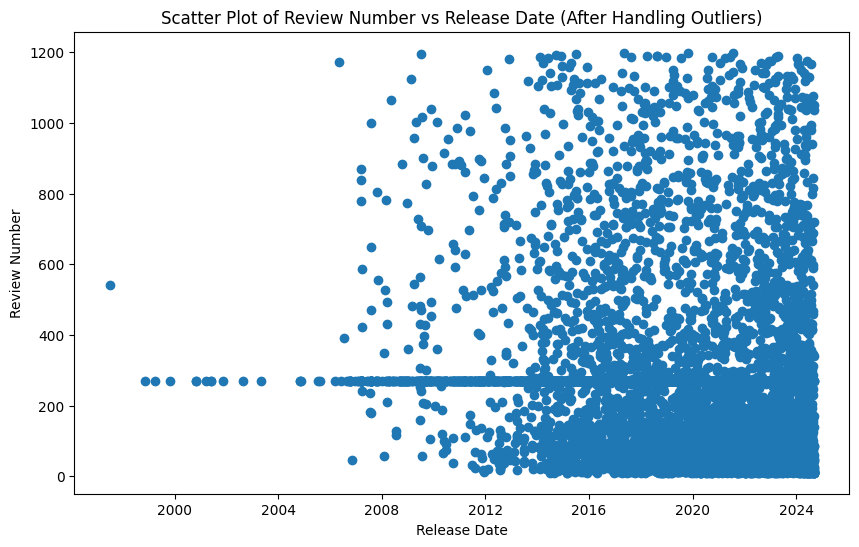

In [34]:

# Преобразуем дату выпуска в формат datetime
df['Release_date'] = pd.to_datetime(df['Release_date'])

# Статистический анализ для определения выбросов
Q1 = df['Review_no'].quantile(0.25)
Q3 = df['Review_no'].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df['Review_no'] < (Q1 - threshold)) | (df['Review_no'] > (Q3 + threshold))

# Вывод выбросов
print("Выбросы:")
print(df[outliers])

# Обработка выбросов
# В данном случае мы заменим выбросы на медианное значение
median_review_no = df['Review_no'].median()
df.loc[outliers, 'Review_no'] = median_review_no

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df['Release_date'], df['Review_no'])
plt.xlabel('Release Date')
plt.ylabel('Review Number')
plt.title('Scatter Plot of Review Number vs Release Date (After Handling Outliers)')
plt.show()

Очистим от строк с пустыми значениями наш датасет

In [37]:
# Удаление строк с пропущенными значениями
df_dropna = df.dropna()

# Вывод количества удаленных строк
num_deleted_rows = len(df) - len(df_dropna)
print(f"\nКоличество удаленных строк: {num_deleted_rows}")

print("\nDataFrame после удаления строк с пропущенными значениями:")
print(df_dropna)


Количество удаленных строк: 515

DataFrame после удаления строк с пропущенными значениями:
                                                   Name  Price Release_date  \
0                                    Black Myth: Wukong  59.99   2024-08-20   
2                                      Counter-Strike 2   0.00   2012-08-21   
4                                    Grand Theft Auto V  10.48   2015-04-14   
5                                 Red Dead Redemption 2  17.99   2019-12-05   
6                                   PUBG: BATTLEGROUNDS   0.00   2017-12-21   
...                                                 ...    ...          ...   
7807  Monster Hunter World: Iceborne - MHW:I Monster...   2.99   2020-02-06   
7808                    Gene Shift Auto: Deluxe Edition   8.99   2022-11-28   
7809                                      Run Ralph Run   0.45   2021-03-03   
7810                                          Quadroids   6.19   2024-02-22   
7811                                   

Теперь создадим выборки.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(".//static//csv//steam_cleaned.csv")

train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Сохранение выборок в файлы
train_df.to_csv(".//static//csv//train_data.csv", index=False)
val_df.to_csv(".//static//csv//val_data.csv", index=False)
test_df.to_csv(".//static//csv//test_data.csv", index=False)

Размер обучающей выборки: 4687
Размер контрольной выборки: 1562
Размер тестовой выборки: 1563


Проанализируем сбалансированность выборок

In [5]:
train_df = pd.read_csv(".//static//csv//train_data.csv")
val_df = pd.read_csv(".//static//csv//val_data.csv")
test_df = pd.read_csv(".//static//csv//test_data.csv")

# Оценка сбалансированности
def check_balance(df, name):
    counts = df['Review_type'].value_counts()
    print(f"Распределение Review_type в {name}:")
    print(counts)
    print(f"Процент положительных отзывов: {counts['Mostly Positive'] / len(df) * 100:.2f}%")
    print(f"Процент отрицательных отзывов: {counts['Overwhelmingly Positive'] / len(df) * 100:.2f}%")
    print()

# Определение необходимости аугментации данных
def need_augmentation(df):
    counts = df['Review_type'].value_counts()
    ratio = counts['Mostly Positive'] / counts['Overwhelmingly Positive']
    if ratio > 1.5 or ratio < 0.67:
        print("Необходима аугментация данных для балансировки классов.")
    else:
        print("Аугментация данных не требуется.")
        
check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")



need_augmentation(train_df)
need_augmentation(val_df)
need_augmentation(test_df)

Распределение Review_type в обучающей выборке:
Review_type
Very Positive              2117
Mostly Positive             810
Mixed                       797
Positive                    710
Overwhelmingly Positive     209
Mostly Negative              15
Very Negative                 2
Overwhelmingly Negative       1
Name: count, dtype: int64
Процент положительных отзывов: 17.28%
Процент отрицательных отзывов: 4.46%

Распределение Review_type в контрольной выборке:
Review_type
Very Positive              708
Mostly Positive            290
Mixed                      241
Positive                   224
Overwhelmingly Positive     78
Mostly Negative              6
Very Negative                2
Name: count, dtype: int64
Процент положительных отзывов: 18.57%
Процент отрицательных отзывов: 4.99%

Распределение Review_type в тестовой выборке:
Review_type
Very Positive              713
Mostly Positive            276
Mixed                      253
Positive                   240
Overwhelmingly Positi

По результатам анализа требуется приращение, соотношения отзывов вне допустимого диапазона

In [19]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
train_df = pd.read_csv(".//static//csv//train_data.csv")
val_df = pd.read_csv(".//static//csv//val_data.csv")
test_df = pd.read_csv(".//static//csv//test_data.csv")

# Преобразование категориальных признаков в числовые
def encode(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        if column != 'Review_type':  # Пропускаем целевую переменную
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
            label_encoders[column] = le
    return label_encoders

# Преобразование целевой переменной в числовые значения
def encode_target(df):
    le = LabelEncoder()
    df['Review_type'] = le.fit_transform(df['Review_type'])
    return le

# Применение кодирования
label_encoders = encode(train_df)
encode(val_df)
encode(test_df)

# Кодирование целевой переменной
le_target = encode_target(train_df)
encode_target(val_df)
encode_target(test_df)

# Проверка типов данных
def check_data_types(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"Столбец '{column}' содержит строковые данные.")

check_data_types(train_df)
check_data_types(val_df)
check_data_types(test_df)

# Функция для выполнения oversampling
def oversample(df):
    if 'Review_type' not in df.columns:
        print("Столбец 'Review_type' отсутствует.")
        return df
    
    X = df.drop('Review_type', axis=1)
    y = df['Review_type']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

# Функция для выполнения undersampling
def undersample(df):
    if 'Review_type' not in df.columns:
        print("Столбец 'Review_type' отсутствует.")
        return df
    
    X = df.drop('Review_type', axis=1)
    y = df['Review_type']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

# Применение oversampling и undersampling к каждой выборке
train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

# Обратное преобразование целевой переменной в строковые метки
def decode_target(df, le_target):
    df['Review_type'] = le_target.inverse_transform(df['Review_type'])

decode_target(train_df_oversampled, le_target)
decode_target(val_df_oversampled, le_target)
decode_target(test_df_oversampled, le_target)

decode_target(train_df_undersampled, le_target)
decode_target(val_df_undersampled, le_target)
decode_target(test_df_undersampled, le_target)

# Проверка результатов
def check_balance(df, name):
    if 'Review_type' not in df.columns:
        print(f"Столбец 'Review_type' отсутствует в {name}.")
        return
    
    counts = df['Review_type'].value_counts()
    print(f"Распределение Review_type в {name}:")
    print(counts)
    
    if 'Positive' in counts and 'Negative' in counts:
        print(f"Процент положительных отзывов: {counts['Positive'] / len(df) * 100:.2f}%")
        print(f"Процент отрицательных отзывов: {counts['Negative'] / len(df) * 100:.2f}%")
    else:
        print("Отсутствуют один или оба класса (Positive/Negative).")
    print()

# Проверка сбалансированности после oversampling
print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

# Проверка сбалансированности после undersampling
print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение Review_type в обучающей выборке:
Review_type
Mostly Positive            2117
Mixed                      2117
Very Positive              2117
Positive                   2117
Overwhelmingly Positive    2117
Mostly Negative            2117
Very Negative              2117
Overwhelmingly Negative    2117
Name: count, dtype: int64
Отсутствуют один или оба класса (Positive/Negative).

Распределение Review_type в контрольной выборке:
Review_type
Very Negative              708
Mostly Positive            708
Mixed                      708
Overwhelmingly Positive    708
Overwhelmingly Negative    708
Positive                   708
Mostly Negative            708
Very Positive              708
Name: count, dtype: int64
Отсутствуют один или оба класса (Positive/Negative).

Распределение Review_type в тестовой выборке:
Review_type
Very Negative              713
Mostly Positive            713
Overwhelmingly Positive    713
Mixed                      713
Overwhelmingly Negat

## 14,400 Classic Rock Tracks (with Spotify Data)

https://www.kaggle.com/datasets/thebumpkin/14400-classic-rock-tracks-with-spotify-data  Этот набор данных, содержащий 1200 уникальных альбомов и 14 400 треков, представляет собой не просто коллекцию — это хроника эволюции классического рока. Каждый трек тщательно каталогизирован с 18 столбцами данных, включая ключевые метаданные, такие как название трека, исполнитель, альбом и год выпуска, наряду с функциями Spotify audio, которые позволяют получить представление о звуковом ландшафте этих неподвластных времени мелодий. Бизнес-цель может заключаться в улучшении стратегии маркетинга и продвижения музыкальных треков. Предположим как этот набор может быть полезен для бизнеса:
Персонализированные рекомендации: Создание алгоритмов, которые будут рекомендовать пользователям музыку на основе их предпочтений.
Цель технического проекта: Разработать и внедрить систему рекомендаций, которая будет предсказывать и рекомендовать пользователям музыкальные треки на основе их предпочтений и поведения.
Входные данные:
Данные о пользователях: Идентификатор пользователя, история прослушиваний, оценки треков, время прослушивания, частота прослушивания.
Данные о треках: Атрибуты треков (название, исполнитель, альбом, год, длительность, танцевальность, энергичность, акустичность и т.д.).
Данные о взаимодействии: Время и частота взаимодействия пользователя с определенными треками.
Целевой признак:
Рекомендации: Булева переменная, указывающая, должен ли конкретный трек быть рекомендован пользователю (1 - рекомендуется, 0 - не рекомендуется).

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(".//static//csv//UltimateClassicRock.csv")
print(df.columns)

Index(['Track', 'Artist', 'Album', 'Year', 'Duration', 'Time_Signature',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Popularity'],
      dtype='object')


Анализируем датафрейм при помощи "ящика с усами". Естьсмещение в сторону меньших значений, это можно исправить при помощи oversampling и undersampling.

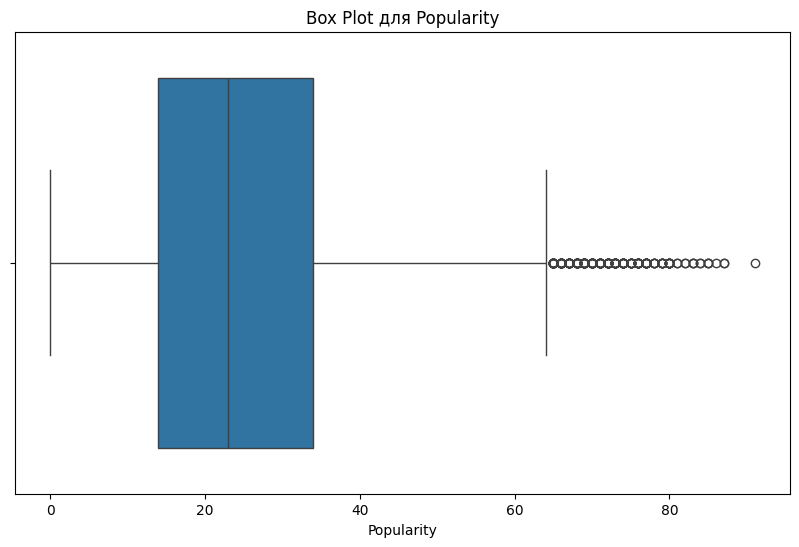

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot для столбца 'Popularity'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Popularity'])
plt.title('Box Plot для Popularity')
plt.xlabel('Popularity')
plt.show()

Решим проблему пустых значений при помощи удаления таких строк.

In [24]:
df_cleaned = df.dropna()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [25]:
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 8650
Размер контрольной выборки: 2884
Размер тестовой выборки: 2884


Оценка сбалансированности выборок, по результатам видно что баланса тут мало

In [29]:
def check_balance(df, name):
    counts = df['Popularity'].value_counts()
    print(f"Распределение Popularity в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение Popularity в обучающей выборке:
Popularity
23    258
15    250
26    246
21    245
14    245
     ... 
84      1
87      1
91      1
79      1
86      1
Name: count, Length: 88, dtype: int64

Распределение Popularity в контрольной выборке:
Popularity
17    90
26    86
21    83
24    83
28    80
      ..
85     1
83     1
84     1
80     1
77     1
Name: count, Length: 85, dtype: int64

Распределение Popularity в тестовой выборке:
Popularity
22    86
21    85
12    84
20    82
26    81
      ..
76     2
71     2
79     1
82     1
80     1
Name: count, Length: 80, dtype: int64



Выполним овер- и андер- слемпинг.

In [30]:
from imblearn.over_sampling import RandomOverSampler

def oversample(df):
    X = df.drop('Popularity', axis=1)
    y = df['Popularity']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Распределение Popularity в обучающей выборке после oversampling:
Popularity
44    258
20    258
30    258
27    258
8     258
     ... 
78    258
79    258
74    258
81    258
86    258
Name: count, Length: 88, dtype: int64

Распределение Popularity в контрольной выборке после oversampling:
Popularity
21    90
11    90
28    90
23    90
37    90
      ..
61    90
84    90
80    90
77    90
0     90
Name: count, Length: 85, dtype: int64

Распределение Popularity в тестовой выборке после oversampling:
Popularity
14    86
47    86
27    86
13    86
66    86
      ..
63    86
79    86
71    86
82    86
80    86
Name: count, Length: 80, dtype: int64



In [31]:
from imblearn.under_sampling import RandomUnderSampler

def undersample(df):
    X = df.drop('Popularity', axis=1)
    y = df['Popularity']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

check_balance(train_df_undersampled, "обучающей выборке после undersampling")
check_balance(val_df_undersampled, "контрольной выборке после undersampling")
check_balance(test_df_undersampled, "тестовой выборке после undersampling")

Распределение Popularity в обучающей выборке после undersampling:
Popularity
0     1
1     1
2     1
3     1
4     1
     ..
84    1
85    1
86    1
87    1
91    1
Name: count, Length: 88, dtype: int64

Распределение Popularity в контрольной выборке после undersampling:
Popularity
0     1
1     1
2     1
3     1
4     1
     ..
82    1
83    1
84    1
85    1
87    1
Name: count, Length: 85, dtype: int64

Распределение Popularity в тестовой выборке после undersampling:
Popularity
0     1
1     1
2     1
3     1
4     1
     ..
76    1
77    1
79    1
80    1
82    1
Name: count, Length: 80, dtype: int64



## Police Shootings in the United States: 2015-2024

В этом наборе данных, составленном The Washington Post, регистрируется каждый человек, застреленный дежурным полицейским в Соединенных Штатах с 2015 по 2024 год. Он решает проблему занижения органами власти статистики реальных инцедентов. Это может быть использовано в журналисткой работе, например для прогнозирования или выявления закономерностей преступлений. Цель технического проекта установить закономерность в убийствах полицейскими определённых групп граждан. Входные данные: возраст, пол, штат, вооружённость. Целевой признак: общий портрет убитого гражданина.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(".//static//csv//2024-07-23-washington-post-police-shootings-export.csv")
print(df.columns)

Index(['date', 'name', 'age', 'gender', 'armed', 'race', 'city', 'state',
       'flee', 'body_camera', 'signs_of_mental_illness',
       'police_departments_involved'],
      dtype='object')


При помощи ящика с усами и колонки возраста проверим набор на баланс. Он достаточно сбалансирован.

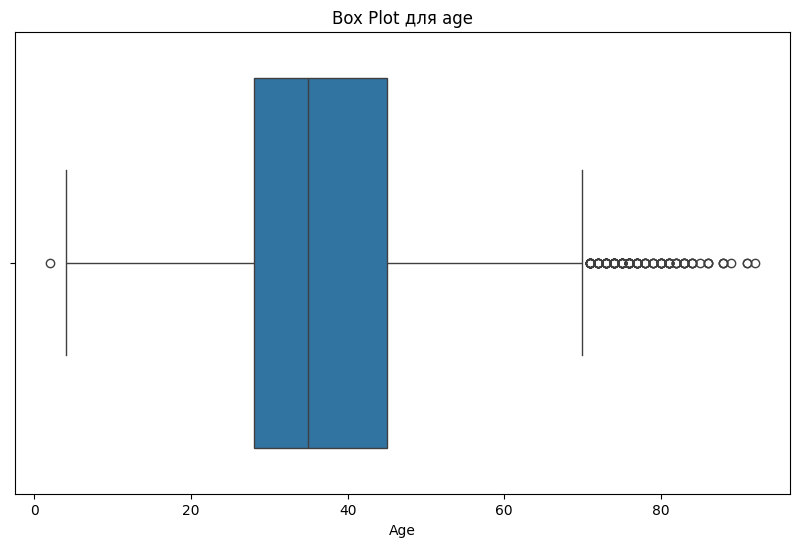

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot для столбца 'age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot для age')
plt.xlabel('Age')
plt.show()

Теперь проверим на шум, здесь тоже особо проблем нет, однако смущает сочетание white и black, вероятно это мулаты.

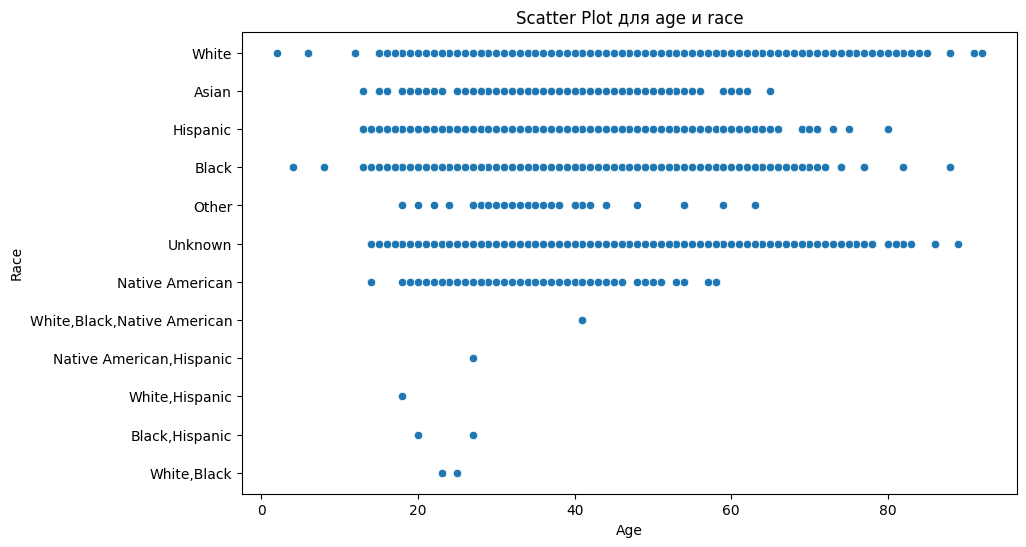

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot для столбцов 'age' и 'race'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='race', data=df)
plt.title('Scatter Plot для age и race')
plt.xlabel('Age')
plt.ylabel('Race')
plt.show()

Удаление строк с пустыми значениями

In [36]:
df_cleaned = df.dropna()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [37]:
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 4770
Размер контрольной выборки: 1591
Размер тестовой выборки: 1591


Применение методов приращения данных (аугментации)

In [40]:
from imblearn.over_sampling import RandomOverSampler

def check_balance(df, name):
    counts = df['race'].value_counts()
    print(f"Распределение reace в {name}:")
    print(counts)
    print()

def oversample(df):
    X = df.drop('race', axis=1)
    y = df['race']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

def undersample(df):
    X = df.drop('race', axis=1)
    y = df['race']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

check_balance(train_df_undersampled, "обучающей выборке после undersampling")
check_balance(val_df_undersampled, "контрольной выборке после undersampling")
check_balance(test_df_undersampled, "тестовой выборке после undersampling")

Распределение reace в обучающей выборке после oversampling:
race
Black                          2187
White                          2187
Hispanic                       2187
Unknown                        2187
Native American                2187
Asian                          2187
White,Black,Native American    2187
Other                          2187
White,Black                    2187
Name: count, dtype: int64

Распределение reace в контрольной выборке после oversampling:
race
White              718
Black              718
Unknown            718
Hispanic           718
Asian              718
Native American    718
Other              718
Name: count, dtype: int64

Распределение reace в тестовой выборке после oversampling:
race
Unknown                     750
White                       750
Black                       750
Hispanic                    750
Asian                       750
Native American             750
Black,Hispanic              750
Other                       750
White,Bla